In [8]:
# https://github.com/siglimumuni/Machine_Learning_with_Python/blob/main/NLP_Project_yelp.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
yelp = pd.read_csv("https://raw.githubusercontent.com/goldenfingaz/Datasets/master/yelp.csv")

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [12]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [13]:
yelp['text length'] = yelp['text'].apply(len)

In [14]:
yelp['text length'].head()

0     889
1    1345
2      76
3     419
4     469
Name: text length, dtype: int64

/home/juanjo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/juanjo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/juanjo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/juanjo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/juanjo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is

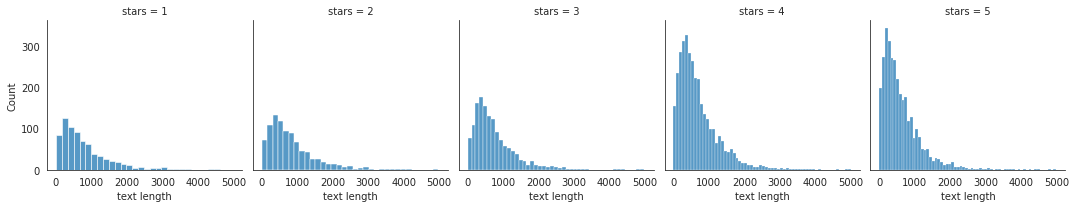

In [15]:
sns.set_style('white')
g = sns.FacetGrid(data = yelp, col='stars')
g.map(sns.histplot,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

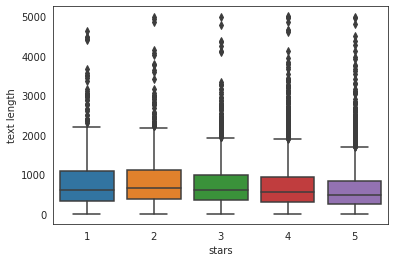

In [16]:
sns.boxplot(data=yelp, x='stars',y='text length')

<AxesSubplot:xlabel='stars', ylabel='count'>

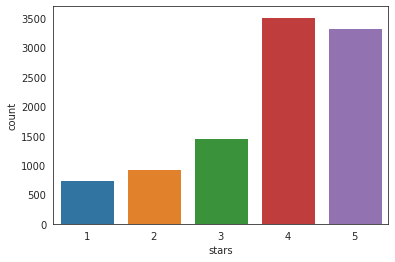

In [17]:
sns.countplot(data=yelp, x='stars')

In [24]:
yelp.groupby(by=['stars']).mean(numeric_only=True)

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [25]:
yelp.groupby('stars').mean(numeric_only=True)

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [27]:
yelp.groupby('stars').mean(numeric_only=True).corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

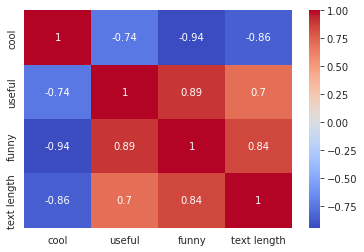

In [29]:
sns.heatmap(yelp.groupby('stars').mean(numeric_only=True).corr(),cmap='coolwarm',annot=True)

In [30]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [31]:
X = yelp_class['text']
y = yelp_class['stars']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [33]:
X = cv.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [36]:
nb.fit(X_train,y_train)

MultinomialNB()

In [37]:
predictions = nb.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[151  88]
 [ 26 961]]
              precision    recall  f1-score   support

           1       0.85      0.63      0.73       239
           5       0.92      0.97      0.94       987

    accuracy                           0.91      1226
   macro avg       0.88      0.80      0.83      1226
weighted avg       0.90      0.91      0.90      1226



In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline([('bow',CountVectorizer()),('tfidf', TfidfTransformer()),('model',MultinomialNB())])

In [45]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [47]:
predictions2 = pipe.predict(X_test)

In [48]:
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test,predictions2))

[[   1  218]
 [   0 1007]]
              precision    recall  f1-score   support

           1       1.00      0.00      0.01       219
           5       0.82      1.00      0.90      1007

    accuracy                           0.82      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.85      0.82      0.74      1226

